In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('salary_dataset.csv')

In [3]:
data.drop(columns='Unnamed: 0',inplace=True)

In [4]:
data.head(3)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0


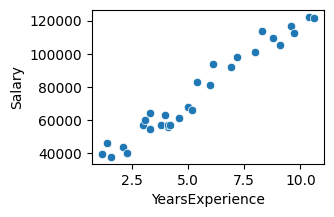

In [34]:
plt.figure(figsize=(3,2))
sns.scatterplot(x='YearsExperience',y='Salary',data=data)
plt.show()

In [35]:
x=data[['YearsExperience']]
y=data['Salary']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
len(x_train)

24

In [39]:
len(x_test)

6

In [45]:
from sklearn.tree import DecisionTreeRegressor 

In [65]:
dc=DecisionTreeRegressor(criterion= 'squared_error', max_depth=8, splitter= 'random')   
dc.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, splitter='random')

In [66]:
dc.score(x_test,y_test)*100, dc.score(x_train,y_train)*100

(97.80854520956332, 99.65651820805788)

In [67]:
dc.predict([[1.4]])

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([46206.])

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:
df={'criterion':["squared_error", "friedman_mse", "absolute_error"],
    'splitter':["best", "random"],
    'max_depth':[i for i in range (1,21)]}

In [70]:
gd=GridSearchCV(DecisionTreeRegressor(),param_grid=df)
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'splitter': ['best', 'random']})

In [71]:
gd.best_params_

{'criterion': 'friedman_mse', 'max_depth': 16, 'splitter': 'random'}

In [72]:
#RandomizedSearchCV mean randomly choose 

In [73]:
df1={'criterion':["squared_error", "friedman_mse", "absolute_error"],
    'splitter':["best", "random"],
    'max_depth':[i for i in range (1,21)]}

In [74]:
rd = RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=df1,n_iter=20) # n_iter mean number of iter you choose randomly
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'splitter': ['best', 'random']})

In [75]:
rd.best_params_

{'splitter': 'random', 'max_depth': 5, 'criterion': 'friedman_mse'}